In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")


In [28]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ronil8/diamond-price-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\swaya\.cache\kagglehub\datasets\ronil8\diamond-price-prediction-dataset\versions\1


In [29]:
import os 
os.listdir(path)

['Diamond Price Prediction.csv']

In [30]:

df = pd.read_csv(os.path.join(path, "Diamond Price Prediction.csv"))
df.head()


,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Carat(Weight of Daimond)  53940 non-null  float64
 1   Cut(Quality)              53940 non-null  object 
 2   Color                     53940 non-null  object 
 3   Clarity                   53940 non-null  object 
 4   Depth                     53940 non-null  float64
 5   Table                     53940 non-null  float64
 6   Price(in US dollars)      53940 non-null  int64  
 7   X(length)                 53940 non-null  float64
 8   Y(width)                  53940 non-null  float64
 9   Z(Depth)                  53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [32]:
df.describe()



,Carat(Weight of Daimond),Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [33]:
df.columns

Index(['Carat(Weight of Daimond)', 'Cut(Quality)', 'Color', 'Clarity', 'Depth',
       'Table', 'Price(in US dollars)', 'X(length)', 'Y(width)', 'Z(Depth)'],
      dtype='object')

In [34]:
df = df.rename(columns={
    'Carat(Weight of Diamond)': 'carat',
    'Cut(Quality)': 'cut',
    'Color': 'color',
    'Clarity': 'clarity',
    'Depth': 'depth',
    'Table': 'table',
    'Price(in US dollars)': 'price',
    'X(length)': 'x',
    'Y(width)': 'y',
    'Z(Depth)': 'z'
})

df.columns


Index(['Carat(Weight of Daimond)', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [35]:
df = df[(df['x'] > 0) & (df['y'] > 0) & (df['z'] > 0)]
df.shape


(53920, 10)

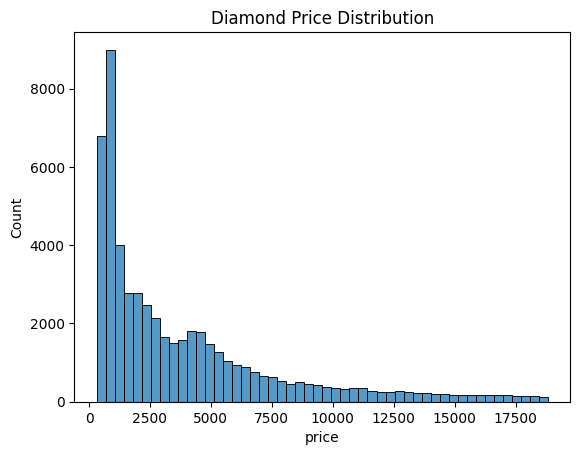

In [36]:
plt.figure()
sns.histplot(df['price'],bins=50)
plt.title("Diamond Price Distribution")
plt.show()

In [37]:
print(df.columns)

Index(['Carat(Weight of Daimond)', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')


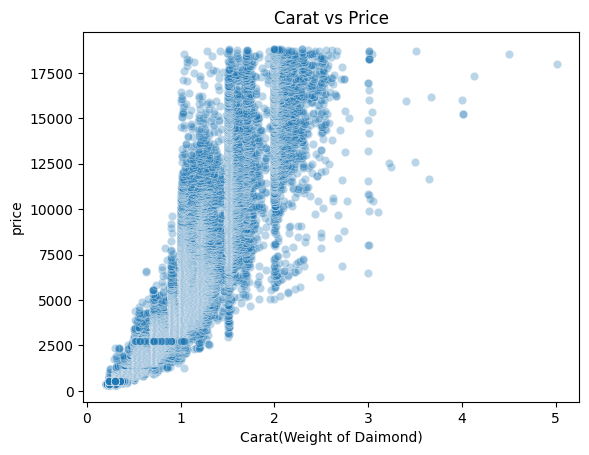

In [38]:
plt.figure()
sns.scatterplot(x='Carat(Weight of Daimond)',y='price',data=df,alpha=0.3)
plt.title("Carat vs Price")
plt.show()

In [39]:
df['volume']=df['x']*df['y']*df['z']
df.head()

,Carat(Weight of Daimond),cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [40]:
X =df.drop('price',axis=1)
y = df['price']
categorical_features = ['cut','color','clarity']
numerical_features = X.drop(columns=categorical_features).columns.tolist()

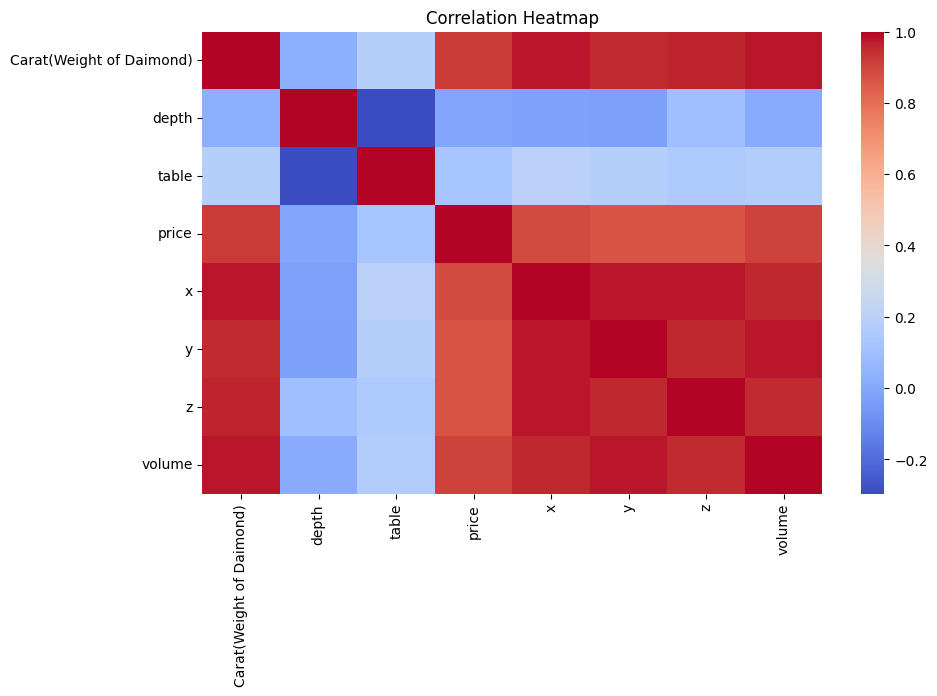

In [41]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [42]:
preprocessor= ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

models = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model',LinearRegression())
])

models.fit(X_train,y_train)
y_pred = models.predict(X_test)
y_pred1=models.predict(X_train)


print("R2 Score",r2_score(y_test,y_pred))
print("R2 Score",r2_score(y_train,y_pred1))


R2 Score 0.9236893299765878
R2 Score 0.9189073197053137


In [43]:
df['volume'] = df['x']*df['y']*df['z']
df.head()

,Carat(Weight of Daimond),cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [44]:
X=df.drop('price',axis=1)
y=df['price']

categorical_features = ['cut','color','clarity']
numerical_features=X.drop(columns=categorical_features).columns.tolist()

In [45]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),numerical_features),
        ('cat', OneHotEncoder(),categorical_features)
    ]
)

In [46]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)

In [47]:
lr_pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',LinearRegression())
])

lr_pipeline.fit(X_train,y_train)
y_pred_lr=lr_pipeline.predict(X_test)

print("Linear Regression")
print("MAE:",mean_absolute_error(y_test,y_pred_lr))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_lr)))
print("R2:",r2_score(y_test,y_pred_lr))

Linear Regression
MAE: 723.268348696843
RMSE: 1106.0781674049729
R2: 0.9236893299765879


In [48]:
ridge_pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',Ridge(alpha=1.0))
])
ridge_pipeline.fit(X_train,y_train)
y_pred_ridge=ridge_pipeline.predict(X_test)


print("Ridge Regression")
print("MAE",mean_absolute_error(y_test,y_pred_ridge))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_ridge)))
print("R2",r2_score(y_test,y_pred_ridge))

Ridge Regression
MAE 723.1737718607941
RMSE 1105.5767003894798
R2 0.9237585088291858


In [49]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

print("Random Forest")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2:", r2_score(y_test, y_pred_rf))



Random Forest
MAE: 264.729445373952
RMSE: 548.2571592421689
R2: 0.9812508212405275


In [50]:
import joblib
joblib.dump(rf_pipeline,"diamond_price_model.pkl")

['diamond_price_model.pkl']

In [51]:
pd.DataFrame({
    "Model": ["Linear", "Ridge", "Random Forest"],
    "R2": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_rf)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf))
    ]
})


,Model,R2,RMSE
0,Linear,0.923689,1106.078167
1,Ridge,0.923759,1105.576700
2,Random Forest,0.981251,548.257159


In [52]:
df_eval = X_test.copy()
df_eval['actual_price'] = y_test
df_eval['predicted_price'] = y_pred_rf
df_eval['difference'] = df_eval['actual_price'] - df_eval['predicted_price']

df_eval.sort_values('difference', ascending=False).head(10)


,Carat(Weight of Daimond),cut,color,clarity,depth,table,x,y,z,volume,actual_price,predicted_price,difference
22142,1.01,Good,G,VS2,63.6,56.0,6.31,6.24,3.99,157.103856,10181,5672.72500,4508.27500
25451,2.00,Fair,G,SI2,66.5,56.0,7.75,7.70,5.14,306.729500,14208,10010.04500,4197.95500
27306,2.09,Premium,H,SI2,60.6,59.0,8.27,8.22,5.00,339.897000,17805,13855.82000,3949.18000
27681,2.22,Premium,J,VS1,60.0,60.0,8.49,8.43,5.08,363.579156,18706,14885.73000,3820.27000
26400,2.01,Premium,H,SI2,63.0,59.0,7.93,7.90,4.99,312.608530,15917,12118.45000,3798.55000
27655,2.07,Premium,F,SI2,60.7,59.0,8.21,8.16,4.97,332.958192,18611,14921.43000,3689.57000
27177,1.50,Good,E,VVS2,64.3,58.0,7.20,7.13,4.61,236.658960,17449,13852.84075,3596.15925
26826,2.14,Premium,H,SI2,62.0,60.0,8.27,8.19,5.10,345.429630,16723,13293.31000,3429.69000
27649,3.01,Good,H,SI2,57.6,64.0,9.44,9.38,5.42,479.925824,18593,15223.94000,3369.06000
17826,1.51,Fair,H,VS2,65.6,56.0,7.08,4.70,4.00,133.104000,7188,4018.33500,3169.66500
